<a href="https://colab.research.google.com/github/oleoespindola/TwitSent/blob/main/APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rdddit Sent

Scrip para buscar assuntos variados no reddit e analisar os comentários dos usuários sobre o assunto, classificandoos como positivos, negativos e neutros usando ajuda da AI generativa da openAI.

#### Bibliotecas Gerais

In [ ]:
from google.colab import userdata

import pandas as pd

### Reddit

Consulta um assunto no sub do Reddi (retorna os 100 orimeiros resutlados), transforma os dados em um DataFrame e faz um backup em csv.

In [ ]:
!pip install praw

In [ ]:
import praw

#### Definindo assunto da Pesquisa e sub do Reddit

In [264]:
query = 'UNIP'
subreddit = 'all'  # Pesquisar em todos os subreddits
limit = 10 # Tamanho da amostragem

####Pesquisa nos subs do Reddit

In [223]:
# Credenciais do Reddit

reddit = praw.Reddit(
    client_id = userdata.get('reddit_client_id'),
    client_secret = userdata.get('reddit_client_secret'),
    user_agent = userdata.get('reddit_user_agent')
)

In [265]:
# Busca pelo assunto

subreddit = reddit.subreddit(subreddit)
submissions  = subreddit.search(query, limit=limit)

In [266]:
# Tratamento do dados

data = {
    "title": [],
    "score": [],
    "id": [],
    "url": [],
    "created": [],
    "author": []
}

for submission in submissions:
    data["title"].append(submission.title)
    data["score"].append(submission.score)
    data["id"].append(submission.id)
    data["url"].append(submission.url)
    data["created"].append(submission.created)
    data["author"].append(submission.author)

# Transformando o dicionário em um DataFrame
df = pd.DataFrame(data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [267]:
# Backup da consulta

df.to_csv('data.csv', index=False)

### OpenAI

Pede para que o chat da openAI classifique os *submissions* como positivos, negativos ou neutros, baseado em snetimentos humanos.

In [ ]:
!pip install openai

In [193]:
from openai import OpenAI

In [232]:
client = OpenAI(
    api_key = userdata.get('openai_api_key')
)

In [252]:
def classify_submission(x):
  completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": f"'Baseado em emoções humanas, classifique o seguinte comentário como positivo, negativo ou neutro: {x}"}
  ]
)
  return completion.choices[0].message.content

In [268]:
df['submission_rating'] = df['title'].apply(classify_submission)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [269]:
df[['title', 'submission_rating']]

,title,submission_rating
0,Como funciona essa faculdade Unip ?,Neutro
1,unip e etc é fim de carreira?,Negativo.
2,Unip é uma boa escolha?,Neutro
3,Graduação na UNIP vale a pena? (Desabafo),Neutro
4,A unip é boa?,Neutro
5,Fazer facul pública não quer dizer muita coisa...,Neutro
6,Acabei de ver o Ranking de universidades da Fo...,Negativo
7,"Formados em particular Uniesquina, me respondam",Neutro
8,Energiekonzern Uniper wird verstaatlicht,Neutro
9,Putin signs decree taking over Russian assets ...,Negativo.


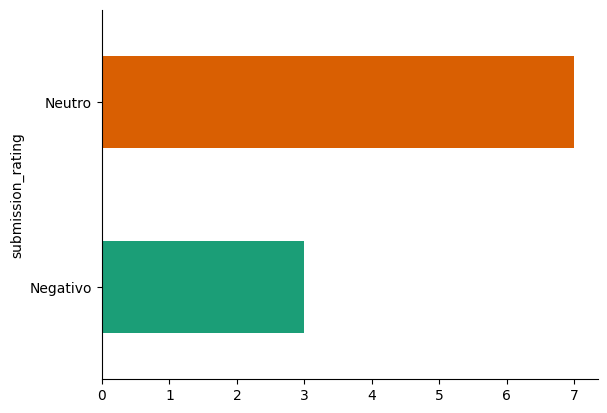

In [270]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('submission_rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)